In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

from src.problem_loaders.tsp_loader import TSPLoader
from src.algorithms.ga_tsp import GeneticAltorithmTSP
from src.algorithms.ant_system import AntSystem
from src.algorithms.ant_tsp import AntTSP

In [2]:
def tsp_fitness(problem_instance: np.ndarray, solution: np.array) -> float:
        weights = []
        for i in range(len(solution)):
            from_node = solution[i]
            # current node to next node
            if i < len(solution) - 1:
                to_node = solution[i + 1]
            # last node to first node
            else:
                to_node = solution[0]
            weights.append(problem_instance[from_node][to_node])
        return sum(weights)

# Optimize Hyperparameters

In [11]:
PROBLEM_INSTANCE_NAME = 'ATT48'
tsp_loader = TSPLoader(PROBLEM_INSTANCE_NAME)
problem_instance, best_solution = tsp_loader.load_problem_instance()
ga_per_trail = []
def objective(trial):
    kwargs = {
        'population_size': trial.suggest_int('population_size', 10, 1000),
        'max_generations': trial.suggest_int('max_generations', 50, 2000),
        'mutation_rate': trial.suggest_float('mutation_rate', 0.001, 1.0),
        'elitism_rate': trial.suggest_float('elitism_rate', 0.0, 1.0),
        'two_children_per_crossover': trial.suggest_categorical('two_children_per_crossover', [True, False])
    }
    ga = GeneticAltorithmTSP(problem_instance, **kwargs)
    ga.run()
    ga_per_trail.append(ga)
    return min(ga.best_fitness_in_generation)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2022-11-26 14:25:51,121] A new study created in memory with name: no-name-00cc7690-eccd-477b-a849-a0389d0a3d22
Generation: 100%|██████████| 1427/1427 [01:53<00:00, 12.58it/s]
[I 2022-11-26 14:27:44,567] Trial 0 finished with value: 38927.0 and parameters: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}. Best is trial 0 with value: 38927.0.
Generation: 100%|██████████| 415/415 [00:06<00:00, 60.70it/s]
[I 2022-11-26 14:27:51,407] Trial 1 finished with value: 79684.0 and parameters: {'population_size': 197, 'max_generations': 415, 'mutation_rate': 0.9802138272316454, 'elitism_rate': 0.9037501841066333, 'two_children_per_crossover': False}. Best is trial 0 with value: 38927.0.
Generation: 100%|██████████| 644/644 [00:19<00:00, 33.59it/s]
[I 2022-11-26 14:28:10,584] Trial 2 finished with value: 46231.0 and parameters: {'population_size': 303, 'max_generations': 644, 'mutation_rat

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


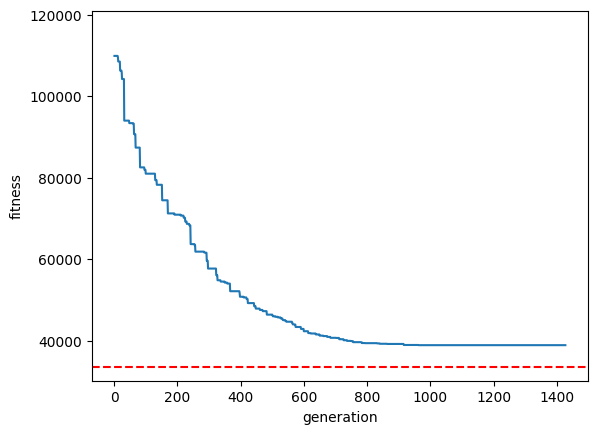

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


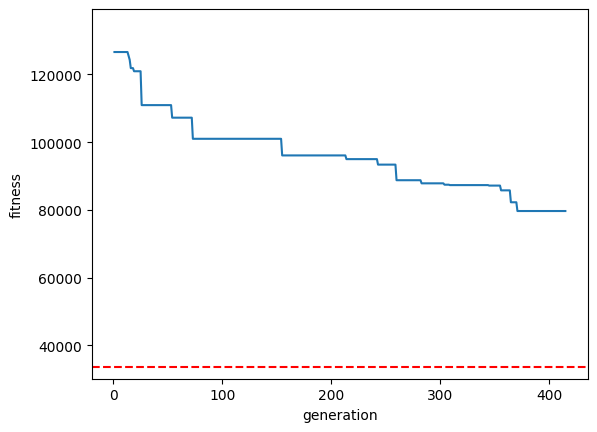

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


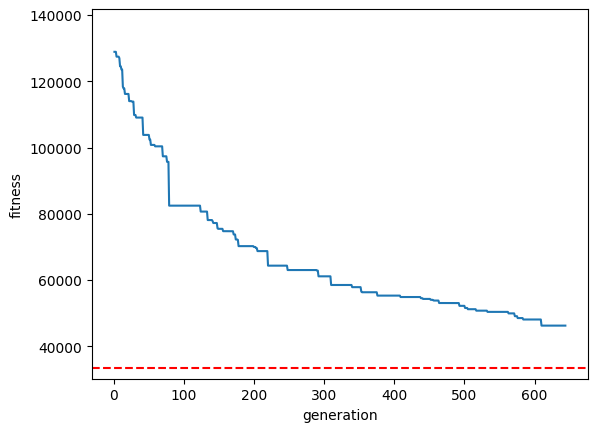

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


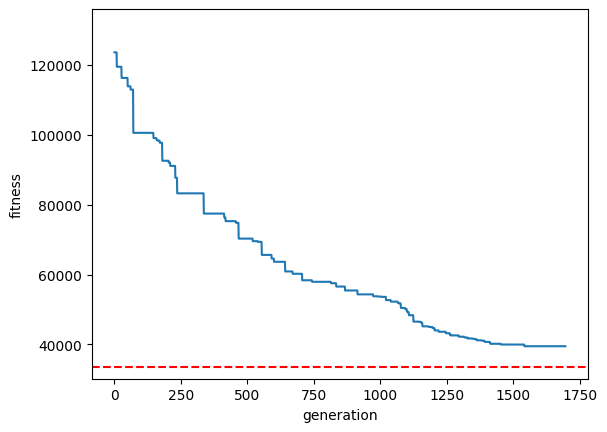

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


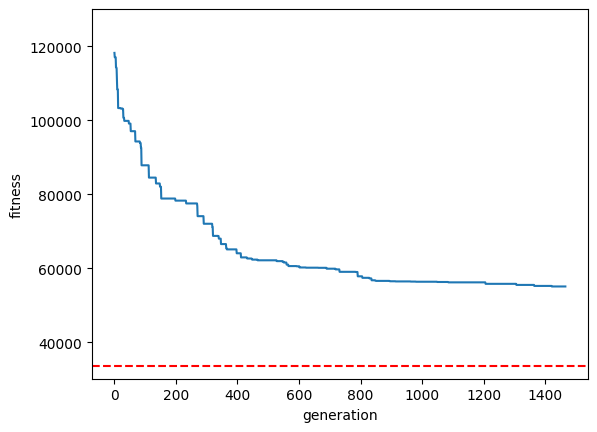

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


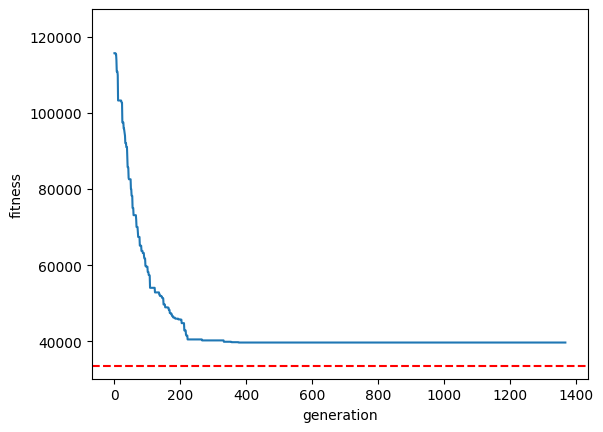

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


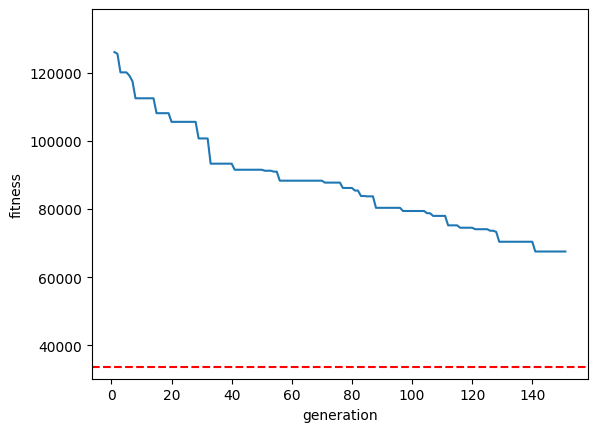

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


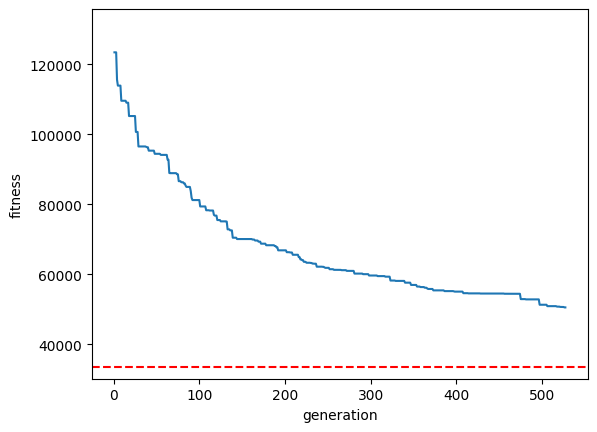

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


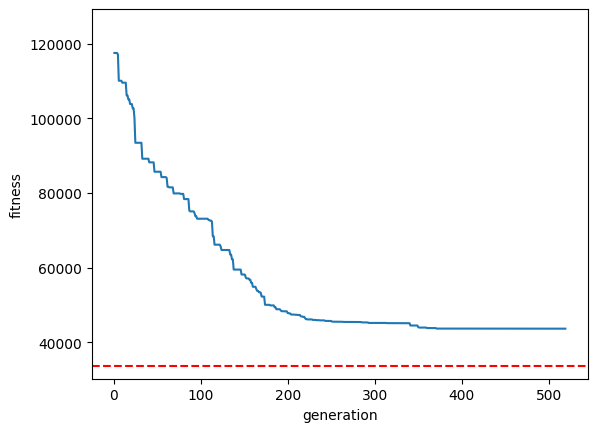

Trail params: {'population_size': 717, 'max_generations': 1427, 'mutation_rate': 0.871590198096359, 'elitism_rate': 0.5529188826281022, 'two_children_per_crossover': True}


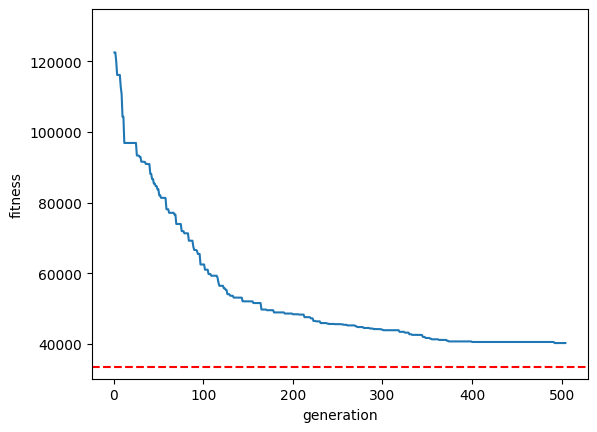

In [22]:
optimal_fitness = tsp_fitness(problem_instance, best_solution)
for trail, ga in enumerate(ga_per_trail):
    print(f'Trail params: {study.get_trials()[0].params}')
    stats_df = ga_per_trail[trail].fitness_df()
    chart = sns.lineplot(data=stats_df, x='generation', y='fitness')
    plt.ylim(optimal_fitness * 0.9, stats_df.fitness.max() * 1.1)
    chart.axhline(optimal_fitness, color='red', linestyle='--')
    plt.show()